<a href="https://colab.research.google.com/github/kavyajeetbora/big-data-spark-linkedin/blob/main/pyspark_installaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Spark

In [ ]:
!sudo add-apt-repository ppa:openjdk-r/ppa
!sudo apt-get update
!sudo apt-get install openjdk-11-jre

 
 More info: https://launchpad.net/~openjdk-r/+archive/ubuntu/ppa
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://ppa.launchpad.net/openjdk-r/ppa/ubuntu bionic InRelease [15.4 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:12 https://developer

In [ ]:
%%time

!apt-get update
!wget -q https://mirrors.estointernet.in/apache/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz
!tar xf spark-3.1.1-bin-hadoop2.7.tgz
!pip install -q findspark

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/openjdk-r/ppa/ubuntu bionic InRelease
Ign:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:14 https://develope

In [ ]:
%%time
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"
os.environ['PYSPARK_SUBMIT_ARGS'] = "--master local[2] pyspark-shell"

CPU times: user 33 µs, sys: 7 µs, total: 40 µs
Wall time: 43.9 µs


In [ ]:
!ls

sample_data  spark-3.1.1-bin-hadoop2.7	spark-3.1.1-bin-hadoop2.7.tgz


## Setting up Spark environment

In [ ]:
import findspark
findspark.init()
from pyspark import SparkContext

sc = SparkContext.getOrCreate()
sc

<SparkContext master=local[2] appName=pyspark-shell>

Sometimes on initiating SparkContext, it throws an error:

**Exception**: Java gateway process exited before sending its port number

Solution can be found [here](https://stackoverflow.com/questions/56916062/why-is-a-call-to-sparksession-builder-getorcreate-in-python-console-being-tre/56916343#56916343)

In [ ]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark

## Downloading the dataset

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.

The link to the website is [here](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2)

And the link to the dataset in csv format that we will be working on is [here](https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD)

In [ ]:
%%time
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2021-04-21 07:16:23--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [               <=>  ]   1.61G  3.42MB/s    in 8m 11s  

2021-04-21 07:24:34 (3.35 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1724798211]

CPU times: user 6.56 s, sys: 1.27 s, total: 7.83 s
Wall time: 8min 11s


In [ ]:
!ls

'rows.csv?accessType=DOWNLOAD'	 spark-3.1.1-bin-hadoop2.7
 sample_data			 spark-3.1.1-bin-hadoop2.7.tgz


In [ ]:
# renaming the csv file
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv

In [ ]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv(
    "reported-crimes.csv",header=True).withColumn(
        "Date",to_timestamp(col("date"),"MM/dd/yyyy hh:mm:ss a")
        ).filter(col("Date")<lit("2018-11-12"))
        
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

## Schema

Schemas can be useful because they allow us to take shortcuts in interpreting the vast amount of information that is available in our environment.

For example: schema defining the datatypes of each column of a table.

However pyspark interprets the datatype of each column by looking at some of the rows automatically. But for production purpose, it is recommended to explicitly assign the datatypes for each column of a table.

In [ ]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, BooleanType, DoubleType, IntegerType

In [ ]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [ ]:
labels = [
    ('ID', StringType()),
    ('Case Number',StringType()),
    ('Date', TimestampType()),
    ('Block', StringType()),
    ('IUCR',StringType()),
    ('Primary Type',StringType()),
    ('Description',StringType()),
    ('Location Description',StringType()),
    ('Arrest',StringType()),
    ('Domestic',BooleanType()),
    ('Beat',StringType()),
    ('District',StringType()),
    ('Ward',StringType()),
    ('Community Area',StringType()),
    ('FBI Code',StringType()),
    ('X Coordinate',StringType()),
    ('Y Coordinate',StringType()),
    ('Year',IntegerType()),
    ('Updated On',StringType()),
    ('Latitude',DoubleType()),
    ('Longitude',DoubleType()),
    ('Location',StringType())
]

In [ ]:
schema = StructType([StructField(x[0],x[1],True) for x in labels])
schema

StructType(List(StructField(ID,StringType,true),StructField(Case Number,StringType,true),StructField(Date,TimestampType,true),StructField(Block,StringType,true),StructField(IUCR,StringType,true),StructField(Primary Type,StringType,true),StructField(Description,StringType,true),StructField(Location Description,StringType,true),StructField(Arrest,StringType,true),StructField(Domestic,BooleanType,true),StructField(Beat,StringType,true),StructField(District,StringType,true),StructField(Ward,StringType,true),StructField(Community Area,StringType,true),StructField(FBI Code,StringType,true),StructField(X Coordinate,StringType,true),StructField(Y Coordinate,StringType,true),StructField(Year,IntegerType,true),StructField(Updated On,StringType,true),StructField(Latitude,DoubleType,true),StructField(Longitude,DoubleType,true),StructField(Location,StringType,true)))

In [ ]:
rc2 = spark.read.csv("/content/reported-crimes.csv", schema = schema)
rc2.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
rc2.show(5)

+--------+-----------+----+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|null|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|    null|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|nul

## Working with columns

In [ ]:
rc.select("IUCR").show(5)

+----+
|IUCR|
+----+
|0486|
|0870|
|0810|
|2023|
|0560|
+----+
only showing top 5 rows



In [ ]:
rc.select("Date", "IUCR", "Block", "Primary Type").show(5)

+-------------------+----+--------------------+------------+
|               Date|IUCR|               Block|Primary Type|
+-------------------+----+--------------------+------------+
|2015-09-05 13:30:00|0486|     043XX S WOOD ST|     BATTERY|
|2015-09-04 11:30:00|0870| 008XX N CENTRAL AVE|       THEFT|
|2018-09-01 00:01:00|0810|082XX S INGLESIDE...|       THEFT|
|2015-09-05 12:45:00|2023|   035XX W BARRY AVE|   NARCOTICS|
|2015-09-05 13:00:00|0560| 0000X N LARAMIE AVE|     ASSAULT|
+-------------------+----+--------------------+------------+
only showing top 5 rows



In [ ]:
rc.select(rc.IUCR).show(5)

+----+
|IUCR|
+----+
|0486|
|0870|
|0810|
|2023|
|0560|
+----+
only showing top 5 rows



**Add a new column with all values as 1**

In [ ]:
from pyspark.sql.functions import lit
rc.withColumn("One", lit(1)).show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|One|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|

**Dropping a column:**

In [ ]:
rc2 = rc.drop("IUCR")
rc2.show(5)

+--------+-----------+-------------------+--------------------+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|            6

## Working with rows

In [ ]:
one_day = spark.read.csv(
    "reported-crimes.csv",header=True).withColumn(
        "Date",to_timestamp(col("date"),"MM/dd/yyyy hh:mm:ss a")
        ).filter(col("Date")==lit("2018-11-12"))
one_day.count()

3

**Concatenating the dataframes**

In [ ]:
rc.union(one_day).orderBy("Date", ascending=False).show(5)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11516594|   JB528186|2018-11-12 00:00:00| 049XX S PRAIRIE AVE|2826|     OTHER OFFENSE|HARASSMENT BY ELE...|               OTHER| fal

**What are the top 10 crime by Primary type in descending order of occurence:**

In [ ]:
%%time
rc.groupby("Primary Type").count().orderBy("count", ascending=False).show(10)

+-------------------+-------+
|       Primary Type|  count|
+-------------------+-------+
|              THEFT|1418592|
|            BATTERY|1232382|
|    CRIMINAL DAMAGE| 771572|
|          NARCOTICS| 711777|
|      OTHER OFFENSE| 418913|
|            ASSAULT| 418561|
|           BURGLARY| 388058|
|MOTOR VEHICLE THEFT| 314157|
| DECEPTIVE PRACTICE| 266344|
|            ROBBERY| 255626|
+-------------------+-------+
only showing top 10 rows

CPU times: user 169 ms, sys: 26.4 ms, total: 195 ms
Wall time: 29.4 s


## Challenges

**What percentage of reported crimes resulted in an arrest:**

In [ ]:
rc.groupby("Arrest").count().show()

+------+-------+
|Arrest|  count|
+------+-------+
| false|4880121|
|  true|1874717|
+------+-------+



In [ ]:
%%time
rc.filter(rc.Arrest=="true").count() / rc.count()

CPU times: user 227 ms, sys: 30.1 ms, total: 257 ms
Wall time: 42.1 s


0.2775369298271846

Less than 28% reported crimes have resulted in an arrest.

**What are the top 3 locations for reported crimes:**

In [ ]:
%%time
rc.groupby("Location Description").count().orderBy("count",ascending=False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770736|
|           RESIDENCE|1145350|
|           APARTMENT| 698572|
+--------------------+-------+
only showing top 3 rows

CPU times: user 159 ms, sys: 20.8 ms, total: 180 ms
Wall time: 29 s


Mostly the crime takes place in the street.

## Pyspark built-in functions

In [ ]:
from pyspark.sql import functions
print(dir(functions))

['Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_udf', '_get_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_column', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aggregate', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'array_distinct', 'array_except', 'array_intersect', 'array_join', 'array_max', 'array_min', 'array_position', 'array_remove', 'array_repeat', 'array_sort', 'array_union', 'arrays_overlap', 'arrays_zip', 'asc', 'asc_nulls_first', 'asc_nulls_last', 'ascii', 'asin', 'asinh', 'assert_true', 'atan', 'atan2', 'atanh', 'a

### String Functions

**Display the Primary type column in lower, upper and first 4 charater of data in the column :**

In [ ]:
from pyspark.sql.functions import lower, upper, substring

In [ ]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [ ]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
rc.select(
    lower(col("Primary type")),
    upper(col("Primary type")),
    substring(col("Primary type"),1,4)
    ).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary type)|upper(Primary type)|substring(Primary type, 1, 4)|
+-------------------+-------------------+-----------------------------+
|            battery|            BATTERY|                         BATT|
|              theft|              THEFT|                         THEF|
|              theft|              THEFT|                         THEF|
|          narcotics|          NARCOTICS|                         NARC|
|            assault|            ASSAULT|                         ASSA|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



### Numeric functions

show the oldest date and the most recent date

In [ ]:
from pyspark.sql.functions import min, max

In [ ]:
rc.select(
    min(col("Date")),
    max(col("Date"))
).show(1)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-11 23:50:00|
+-------------------+-------------------+



### Date functions

what is the date 3 days earlier than the oldest date and what is the date 3 days after the latest date

In [ ]:
from pyspark.sql.functions import date_add, date_sub

In [ ]:
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start, days)
    Returns the date that is `days` days after `start`
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 9))]



In [ ]:
rc.select(
    date_sub(min(col("Date")),3),
    date_add(max(col("Date")),3)
).show(1)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-14|
+----------------------+----------------------+



## Working with dates

Converting / Interpreting string dates into datetime objects 

In [ ]:
from pyspark.sql.functions import to_date, to_timestamp, lit

**2019-12-25 13:30:00**

In [ ]:
df1 = spark.createDataFrame([("2019-12-25 13:30:00",)], ["Christmas"])
df1.show(1)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [ ]:
df1.select(
    to_date(col("Christmas"),"yyyy-MM-dd HH:mm:ss"),
    to_timestamp(col("Christmas"),"yyyy-MM-dd HH:mm:ss")
    ).show(1)

+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             2019-12-25|                         2019-12-25 13:30:00|
+---------------------------------------+--------------------------------------------+



**25/Dec/2019 13:30:00**

In [ ]:
df2 = spark.createDataFrame([("25/Dec/2019 13:30:00",)], ["Christmas"])
df2.show(1)

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [ ]:
df2.select(
    to_date(col("Christmas"),"dd/MMM/yyyy HH:mm:ss"),
    to_timestamp(col("Christmas"), 'dd/MMM/yyyy HH:mm:ss')
    ).show(1)

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                              2019-12-25|                          2019-12-25 13:30:00|
+----------------------------------------+---------------------------------------------+



**12/25/2019 01:30:00 PM**

In [ ]:
df3 = spark.createDataFrame([("12/25/2019 01:30:00 PM",)], ["Christmas"])
df3.show(1, truncate=False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [ ]:
df3.select(
    to_date(col("Christmas"),"MM/dd/yyyy hh:mm:ss a"),
    to_timestamp(col("Christmas"),"MM/dd/yyyy hh:mm:ss a")
    ).show(1)

+-----------------------------------------+----------------------------------------------+
|to_date(Christmas, MM/dd/yyyy hh:mm:ss a)|to_timestamp(Christmas, MM/dd/yyyy hh:mm:ss a)|
+-----------------------------------------+----------------------------------------------+
|                               2019-12-25|                           2019-12-25 13:30:00|
+-----------------------------------------+----------------------------------------------+



In [ ]:
nrc = spark.read.csv("reported-crimes.csv", header=True)
nrc.show(5, truncate=False)

+--------+-----------+----------------------+---------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date                  |Block                |IUCR|Primary Type|Description            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+----------------------+---------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|10224738|HY411648   |09/05/2015 01:30:00 PM|043XX S WOOD ST      |0486|BATTERY     |DOMESTIC BAT

The orginal dateset in the Date column has dates in string format. We can convert the dates using the command 



```python
df3.select(
    to_timestamp(col("Christmas"),"MM/dd/yyyy hh:mm:ss a")
    ).show(1)
```

this above code will interpret the dates as the format provided and convert them into datetime objects for further processing.



## User Defined functions

User defined using python and spark has a overhead in processing. Because the function written in python needs to be serealized first before running the row-wise operation on the dataset.

Hence to improve the performance:
- write the functions in native Scala or java programming language
- Use the built-in functions as much as possible, as they are highly optimized

Another project called Apache Arrow, which is created in order to have access to the dataset via any programming language without any performance costs. This is done by standardising the format in which the dataset is stored in memory. So there is no cost associated while processing because there is no requirement of object translation by serializing and deserializing the functions.

This will definitely speed up the python process. 

## Working Joins

In [ ]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In the given dataset, only district number is provided. We might also want the district name which is not present in the current table. 

We can get the district names from another dataset:

- [Webpage](https://data.cityofchicago.org/Public-Safety/Police-Stations/z8bn-74gv)
- Link to the [data file in csv format](https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD)

In [ ]:
%%time
!wget -O police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
!ls

--2021-04-21 07:30:07--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2021-04-21 07:30:08 (543 MB/s) - ‘police-station.csv’ saved [5699]

police-station.csv   sample_data		spark-3.1.1-bin-hadoop2.7.tgz
reported-crimes.csv  spark-3.1.1-bin-hadoop2.7
CPU times: user 29.5 ms, sys: 13.8 ms, total: 43.3 ms
Wall time: 954 ms


In [ ]:
ps = spark.read.csv("police-station.csv", header=True)
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

Here the district name along with district number is provided. 

We will try to join the tables on the district numbers so that we get the district name on our previous table i.e. reported-crimes.csv

But here we require all the keys in the reported-crimes.csv even if there is no data corresponding to a district number in the police-station.csv.

Hence we will do a **Left-outer join**


**The reported crime data has only the district number. Add the district name to it by joining it with police station data**

In [ ]:
%%time
rc.cache()
rc.count()

CPU times: user 877 ms, sys: 118 ms, total: 996 ms
Wall time: 2min 42s


In [ ]:
ps.select(col("DISTRICT")).distinct().show(30)

+--------------------+
|            DISTRICT|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+



In [ ]:
rc.select(col("District")).distinct().show(30)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|    null|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     021|
|     002|
+--------+



The police station data format is not similar to the reported crimes data. 

We will standardise the data format in the police station data format, similar to the police station data

In [ ]:
from pyspark.sql.functions import lpad

In [ ]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col, len, pad)
    Left-pad the string column to width `len` with `pad`.
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



In [ ]:
ps.select(lpad(col("DISTRICT"),3,"0")).show(15)

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
+--------------------+
only showing top 15 rows



In [ ]:
ps = ps.withColumn("Format_district", lpad(col("DISTRICT"),3,"0"))
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

Now we require minimum all the district numbers present in the reported-crime dataset. So we will perform left-outer join:

In [ ]:
rc.join(ps, rc.District==ps.Format_district, "left_outer").show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+-------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT|DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+--------+

In [ ]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district']

In [ ]:
rc.join(ps, rc.District==ps.Format_district, "left_outer").drop(
    'ADDRESS',
    'CITY',
    'STATE',
    'ZIP',
    'WEBSITE',
    'PHONE',
    'FAX',
    'TTY',
    'X COORDINATE',
    'Y COORDINATE',
    'LATITUDE',
    'LONGITUDE',
    'LOCATION'
).show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT|DISTRICT NAME|Format_district|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+---------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|            61|     08B|2015|02/10/2018 03:50:...|       9|      Deering|            009|
|1022473

## Challenge on Functions

**What is the most frequent reported non-criminal activity:**

In [ ]:
rc.select(col("Primary Type")).distinct().orderBy(col("Primary Type")).show(30, truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [ ]:
nc = rc.filter(
    (col("Primary Type") == "NON - CRIMINAL") 
    | (col("Primary Type") == "NON-CRIMINAL")
    | (col("Primary Type") == "NON-CRIMINAL (SUBJECT SPECIFIED)")
)

nc.show(5)

+--------+-----------+-------------------+--------------------+----+--------------+-----------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|  Primary Type|      Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------+-----------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10233370|   HY421530|2015-09-13 10:45:00|  010XX S MENARD AVE|5114|NON - CRIMINAL|FOID - REVOCATION|           RESIDENCE|  true|   false|1513|     015|  

In [ ]:
nc.groupby("Description").count().orderBy("count", ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|FOUND PASSPORT                             |4    |
|CONCEALED CARRY LICENSE REVOCATION         |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



**Find the day of the week with the most reported crime:**

In [ ]:
from pyspark.sql.functions import dayofweek, date_format

In [ ]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col)
    Extract the day of the week of a given date as integer.
    
    .. versionadded:: 2.3.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]



In [ ]:
rc.groupby(dayofweek(col("Date"))).count().orderBy("count",ascending=False).show()

+---------------+-------+
|dayofweek(Date)|  count|
+---------------+-------+
|              6|1017105|
|              4| 974013|
|              3| 968160|
|              7| 965291|
|              5| 964687|
|              2| 952859|
|              1| 912723|
+---------------+-------+



In [ ]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date, format)
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of `datetime pattern`_. can be used.
    
    .. _datetime pattern: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
    
    .. versionadded:: 1.5.0
    
    Notes
    -----
    Whenever possible, use specialized functions like `year`.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]



In [ ]:
rc.groupby(date_format(col("Date"),"E")).count().orderBy("count",ascending=False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017105|
|                 Wed| 974013|
|                 Tue| 968160|
|                 Sat| 965291|
|                 Thu| 964687|
|                 Mon| 952859|
|                 Sun| 912723|
+--------------------+-------+



### plotting the results

In [ ]:
day_counts = rc.groupby(date_format(col("Date"),"E")).count().collect()
day_counts

[Row(date_format(Date, E)='Sun', count=912723),
 Row(date_format(Date, E)='Mon', count=952859),
 Row(date_format(Date, E)='Thu', count=964687),
 Row(date_format(Date, E)='Sat', count=965291),
 Row(date_format(Date, E)='Wed', count=974013),
 Row(date_format(Date, E)='Fri', count=1017105),
 Row(date_format(Date, E)='Tue', count=968160)]

In [ ]:
days = [x[0] for x in day_counts]
counts = [x[1] for x in day_counts]
print(days)
print(counts)

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']
[912723, 952859, 964687, 965291, 974013, 1017105, 968160]


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

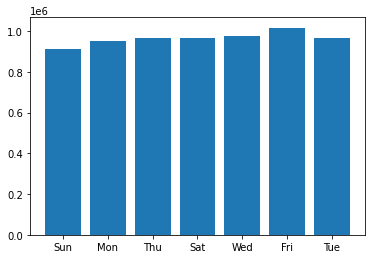

In [ ]:
plt.bar(days,counts)
plt.show()

In [ ]:
d = {"day":days, "count":counts}
df = pd.DataFrame(d)
df

,day,count
0,Sun,912723
1,Mon,952859
2,Thu,964687
3,Sat,965291
4,Wed,974013
5,Fri,1017105
6,Tue,968160


In [ ]:
df = df.sort_values(by="count", ascending=False)
df

,day,count
5,Fri,1017105
4,Wed,974013
6,Tue,968160
3,Sat,965291
2,Thu,964687
1,Mon,952859
0,Sun,912723


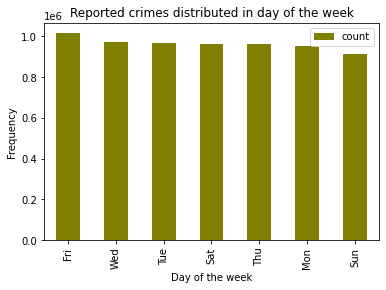

In [ ]:
df.plot(kind="bar", x="day", y="count", color="Olive")
plt.title("Reported crimes distributed in day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.show()

## Resilient Distributed Datasets (RDD)

- resilient - ability to be recomputed from the history
- distributed - internally spark distributes the data in RDD, to different nodes across the cluster to achieve parallelization 

**RDD**

It is the primary api for version 1 of spark. It is also available in version 2. Almost all the codes that we were running using spark dataframes compiles down to RDDs.

Is an immutable partition of dataset that can be worked on in parrallel. As shown in the picture below:

<img src="https://raw.githubusercontent.com/kavyajeetbora/big-data-spark-linkedin/main/resilient%20distributed%20dataframes.JPG" height=350 width=600/>

In case of dataframes, each entry is a structured row with a known schema. In the case of RDDs, the records are just java, scala and python objects. 

So there are couple of challenges associated with it:

- Spark doesnot understand the inner structure of your records
- We need to manually recreate any optimizations that was available in the dataframes. 
- The RDD api is available in scala, java and python
- We can get good performance with scala and java. 
- But with python the performace is slow. We have to serealize the functions first then serealize back to JVM

Performance difference between RDDS and DataFrames:
- RDDs lack a lot of optimization that dataframes has.
- also RDDs doesnot have a lot of in-built functions that dataframes has, this means that we need to define each filter, map and aggregation as a function

In spark: 

- **Transformations** returns RDDs data type. For example: map, flatMap, filter etc
- **Actions** returns another data type. For example: reduce, count etc 



In [ ]:
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

In [ ]:
sc

<SparkContext master=local[2] appName=pyspark-shell>

In [ ]:
ps_rdd = sc.textFile("police-station.csv")
ps_rdd

police-station.csv MapPartitionsRDD[284] at textFile at NativeMethodAccessorImpl.java:0

In [ ]:
ps_header = ps_rdd.first()
ps_header

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [ ]:
ps_rest = ps_rdd.filter(lambda line: line!=ps_header)
ps_rest.first()

'Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,,,,1177731.401,1881697.404,41.83070169,-87.62339535,"(41.8307016873, -87.6233953459)"'

**How many police stations are there ?**

In [ ]:
ps_rest.map(lambda line: line.split(",")).count()

24

**Display the district ID, district name, address and zip for the police station with district ID 7:**

In [ ]:
ps_rest.filter(lambda line: line.split(",")[0]=="7").map(lambda line: line.split(",")[0:6]).collect()

[['7', 'Englewood', '1438 W 63rd St', 'Chicago', 'IL', '60636']]

**Police stations 10 and 11 are geographically close to each other. Display the district ID, District name, address and zip code**

In [ ]:
ps_rest.filter(lambda line: line.split(",")[0] in ["10","11"]).map(lambda line: line.split(",")[0:6]).collect()

[['10', 'Ogden', '3315 W Ogden Ave', 'Chicago', 'IL', '60623'],
 ['11', 'Harrison', '3151 W Harrison St', 'Chicago', 'IL', '60612']]

## Next Steps

Explore 
- Spark streaming 
- spark's machine learning library